In [4]:
# Import libraries and load the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/nadinejackson/Downloads/titanic/train.csv')

In [5]:
# Analyze the dataset

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Get the summary of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [8]:
# Feature engineering

# Create new features
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1


In [9]:
# Categorical features encoding

data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)


In [10]:
# Drop unnecessary columns

data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)


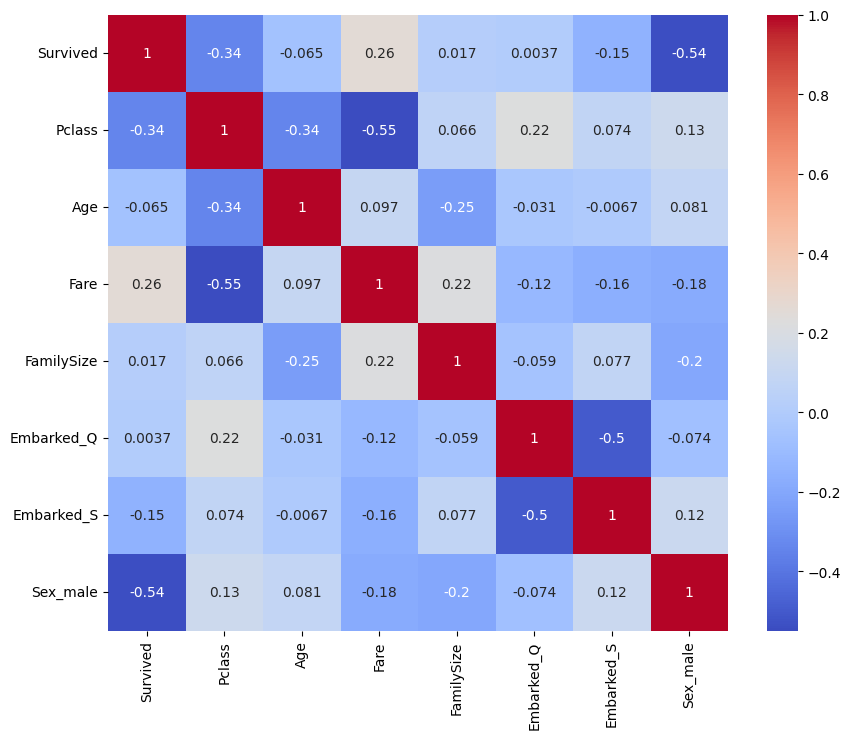

In [11]:
# Visualize the results

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Create a simple unit test to check if the number of columns in the preprocessed dataset matches the expected value

def test_preprocessed_data_columns():
    expected_columns = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S', 'Sex_male']
    assert len(data.columns) == len(expected_columns), f"Expected {len(expected_columns)} columns, but got {len(data.columns)}"
    assert set(data.columns) == set(expected_columns), f"Expected columns {expected_columns}, but got {list(data.columns)}"

    return "All tests passed."

# Call the test function and print the result
print(test_preprocessed_data_columns())

All tests passed.
